In [173]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
import warnings
warnings.filterwarnings("ignore")

In [175]:
# Load data
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

# Dataset Information

In [176]:
# Preview of data
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [177]:
# Number of columns and samples
columns = len(df.columns)
samples = len(df)
print(f"No. of Columns: {columns}")
print(f"No. of Samples: {samples}")

No. of Columns: 22
No. of Samples: 253680


In [178]:
# Basic statistics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [179]:
# Drop columns which are not related to the health indicators
df.drop(columns=["Education", "Income"], inplace=True)

# Dataset Visualisation

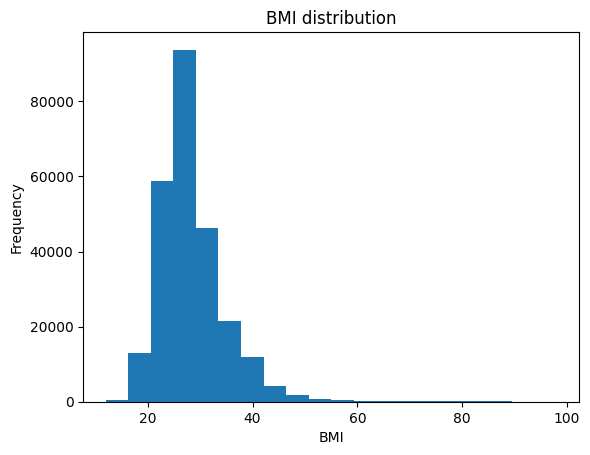

In [180]:
# BMI Distribution
plot = df["BMI"].hist(bins=20)
plot.set_title('BMI distribution')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig("../visualisations/bmi_distribution.png")
plt.show()

In [181]:
# Find Null Values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

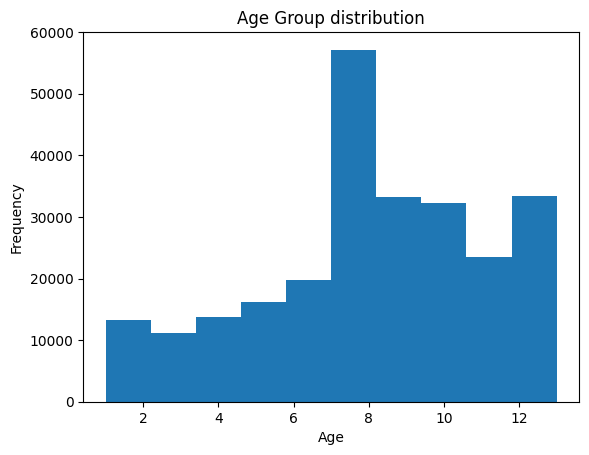

In [182]:
# Age Group Distribution
plot = df["Age"].hist()
plot.set_title('Age Group distribution')
plot.set_xlabel('Age')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig('../visualisations/age_group_distribution.png')
plt.show()

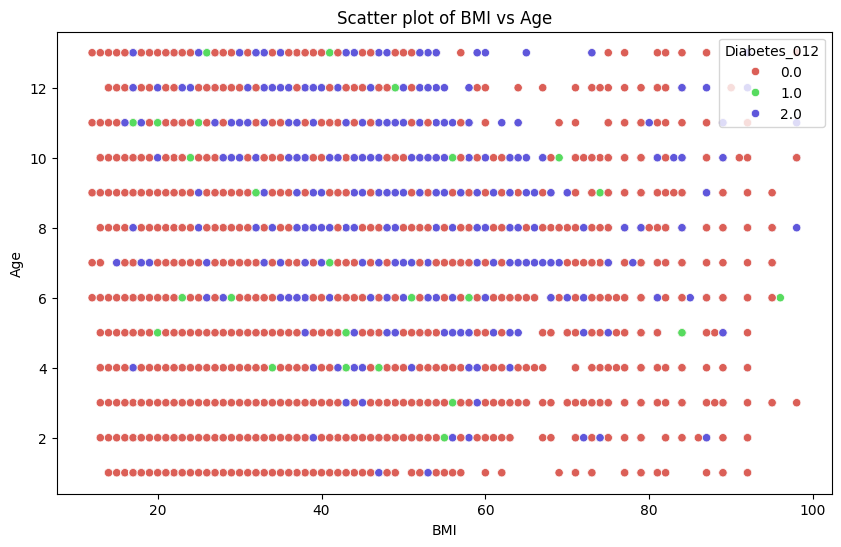

In [183]:
# Scatter plot for Age vs BMI
palette = sns.color_palette("hls", 3)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Age', hue='Diabetes_012', palette=palette)
plt.title('Scatter plot of BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.savefig('../visualisations/age_bmi_scatterplot.png')
plt.show()

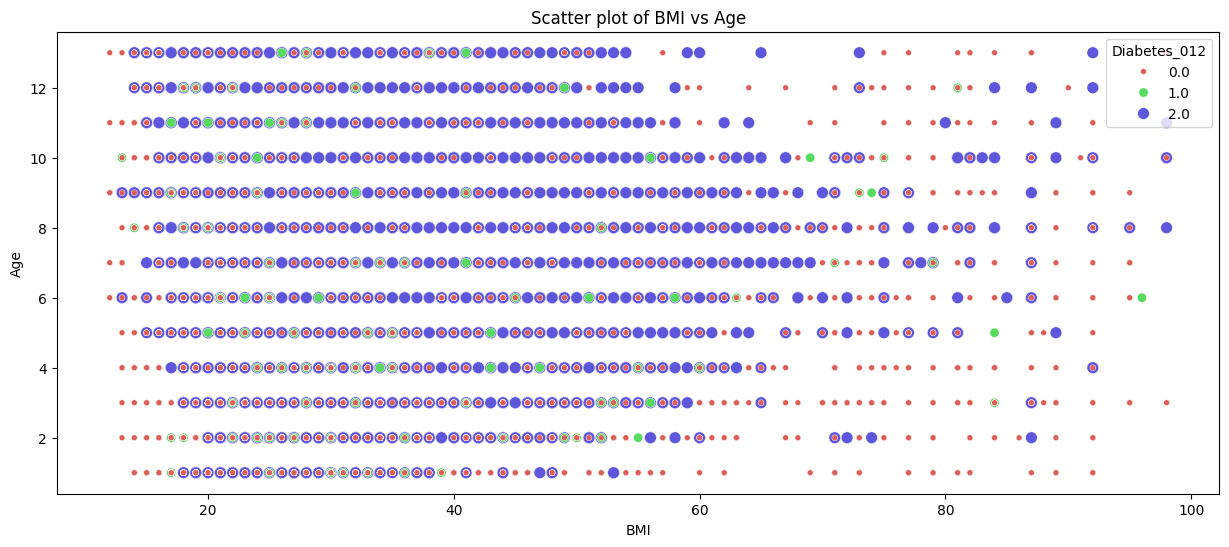

In [184]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='BMI', y='Age', hue='Diabetes_012', palette=palette,size='Diabetes_012')
plt.title('Scatter plot of BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.savefig('../visualisations/age_bmi_scatterplot_size.png')
plt.show()

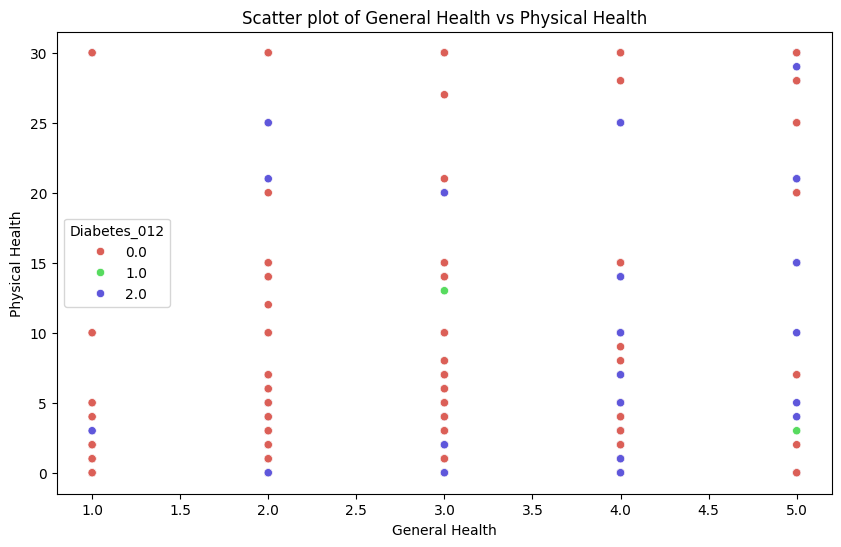

In [185]:
# Scatter plot for General Health vs Physical Health
plt.figure(figsize=(10, 6))

# Get top 1000 samples to avoid overplotting
sns.scatterplot(data=df.sample(1000), x='GenHlth', y='PhysHlth', hue='Diabetes_012', palette=palette)

plt.title('Scatter plot of General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health')
plt.savefig('../visualisations/genhealth_phyhealth_scatterplot.png')
plt.show()

In [186]:
# Find correlation data
corr = df.corr() 
corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547


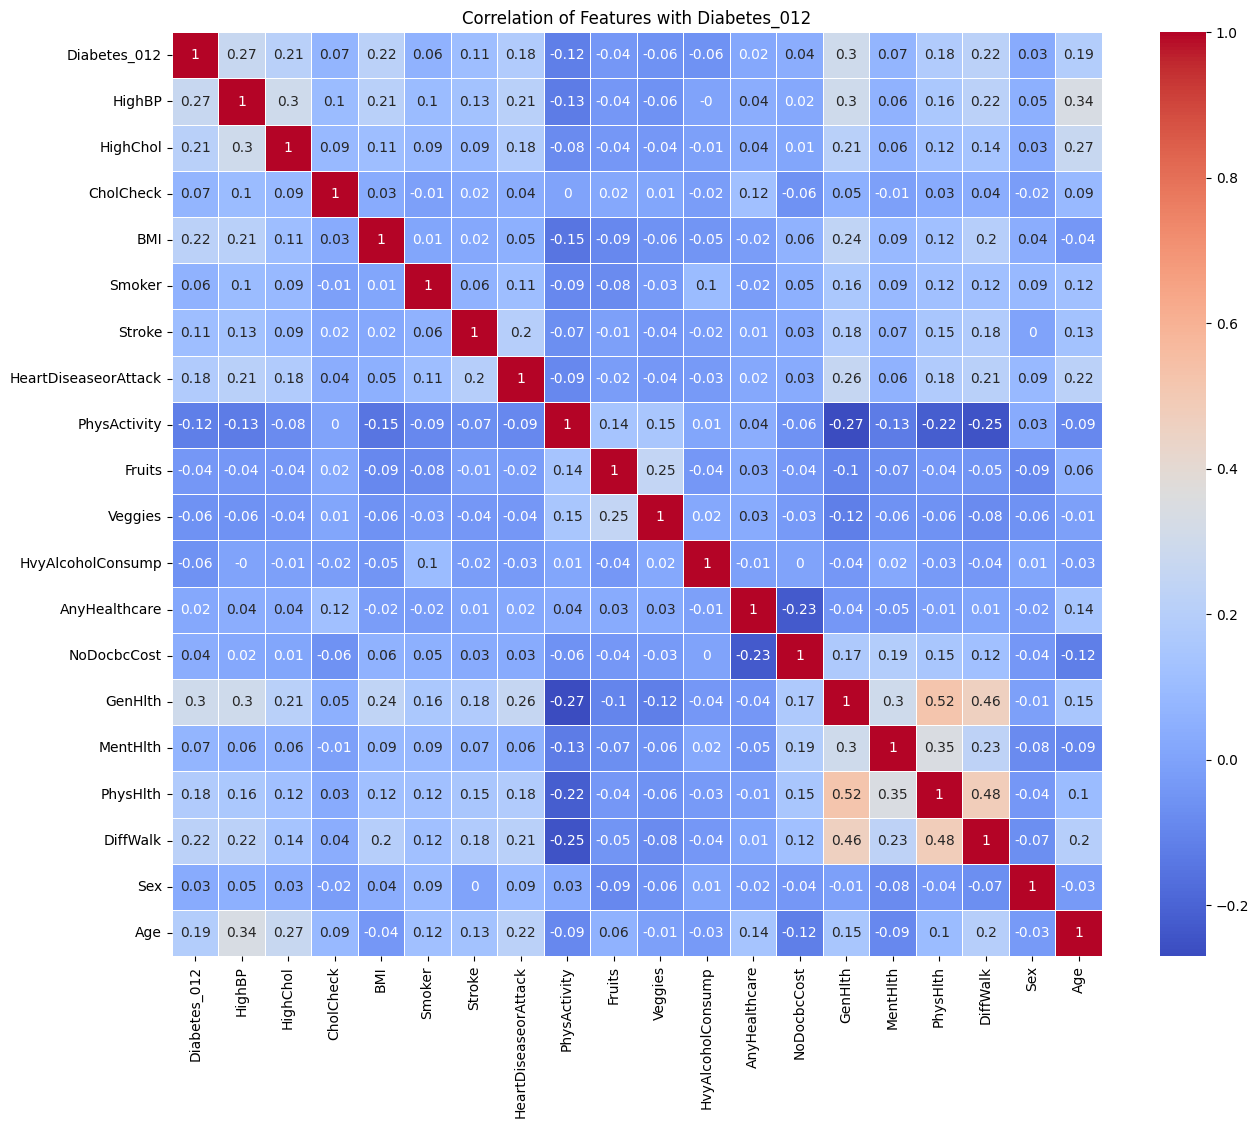

In [187]:
# Correlation Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr.map(lambda x: round(x, 2)), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.savefig('../visualisations/correlation_heatmap.png')
plt.show()

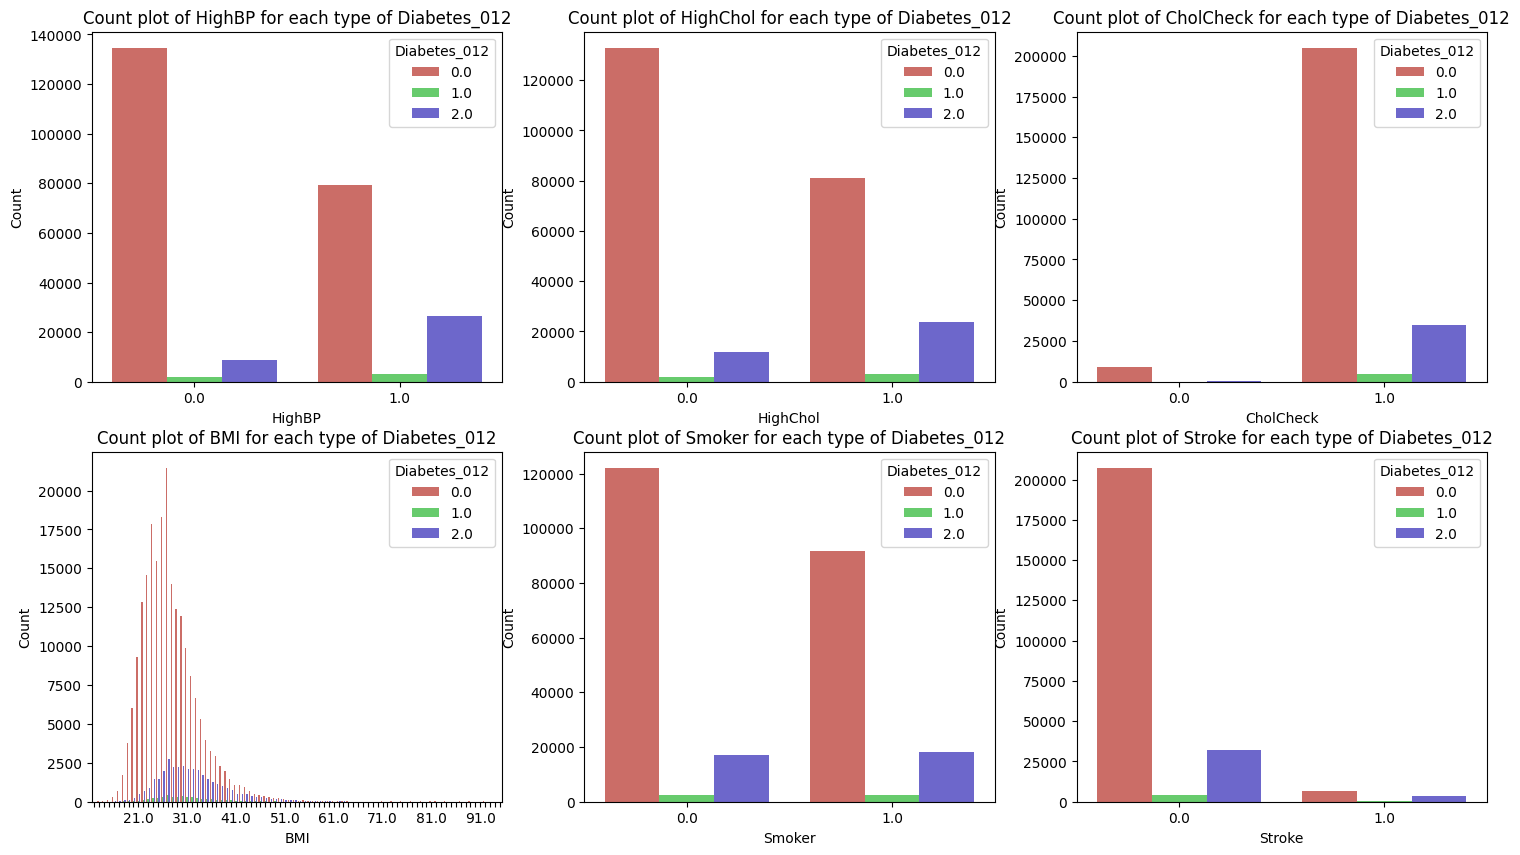

In [223]:
import seaborn.objects as so
# Get the top 3 most correlated features with Diabetes_012
top_features = corr.drop(labels=["Diabetes_012"], axis=0).head(6).index

# Plot scatterplots for the top 6 features
plt.figure(figsize=(18, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    
    plot = sns.countplot(df, x=feature, hue="Diabetes_012",palette=palette)
    plt.title(f'Count plot of {feature} for each type of Diabetes_012')
    if len(pd.unique(df[feature])) > 50:
        for (j,label) in enumerate(plot.axes.get_xticklabels(),1):
            if j % 10 != 0:
                label.set_visible(False)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.savefig('../visualisations/top_features_count.png')
plt.show()

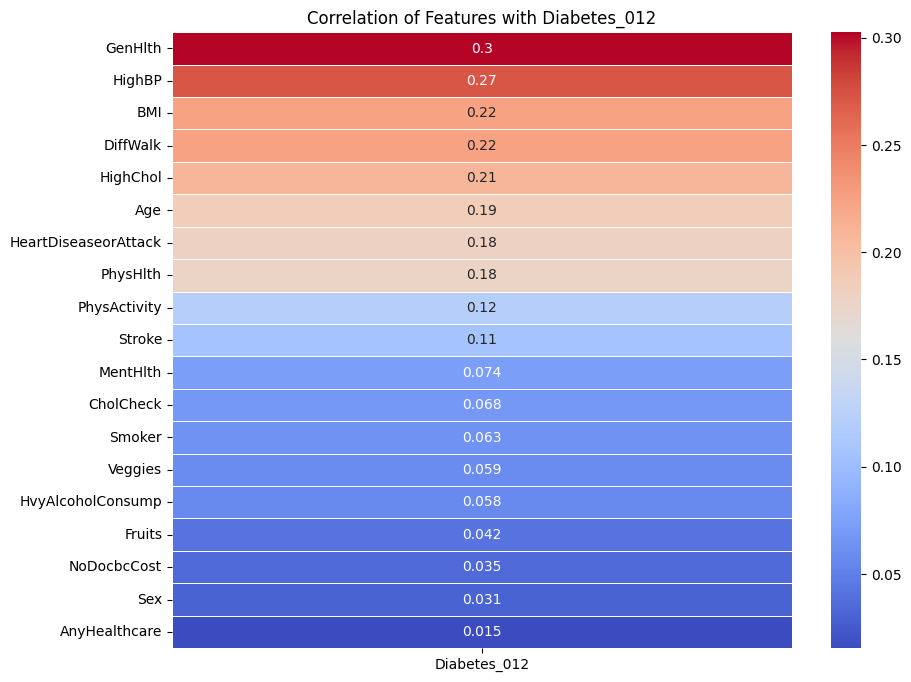

In [189]:
# Correlation of Features with Diabetes_012
clean_corr = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0).map(lambda x: abs(x)).sort_values(by='Diabetes_012', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(clean_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.savefig('../visualisations/correlation_with_diabetes.png')
plt.show()

In [190]:
# Get most related columns
clean_df = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0)
clean_df = clean_df[abs(clean_df["Diabetes_012"]) > 0.1]
related_columns = [*clean_df.index]
related_columns

['HighBP',
 'HighChol',
 'BMI',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age']

# Preprocessing

In [191]:
from sklearn.model_selection import train_test_split

# Load data
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [192]:
# Load data from the most related columns
X_spec = df.drop(columns=["Diabetes_012", *[c for c in df.columns if c not in related_columns]])
y_spec = df["Diabetes_012"]

# Split data into training and testing sets
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X, y, test_size=0.3)

# Model Training

In [193]:
import timeit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    metrics = {}
    y_pred = model.predict(X_test)

    # measure average time taken for prediction
    start_time = timeit.default_timer()
    model.predict(X_test)
    end_time = timeit.default_timer()
    avg_prediction_time = (end_time - start_time) / len(X_test)
    
    metrics["Average Prediction Time"] = avg_prediction_time
    
    # get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # get precision
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # get recall
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # get f1 score
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=np.nan)
    
    # get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision,
    metrics["Recall"] = recall,
    metrics["F1 Score"] = f1
    metrics["Confusion Matrix"] = cm
    metrics["Classification Report"] = report
    
    return metrics

In [194]:
# format metrics output as string
def format_metrics(metrics):
    result = ""

    for metric, value in metrics.items():
        result += f"{metric}: {'\n' if metric == 'Confusion Matrix' or metric == 'Classification Report' else ''} {value}"
        result += "\n"
        
    return result

In [195]:
from sklearn.utils.validation import check_is_fitted

# check if model has been fitted
def is_model_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except:
        return False

In [196]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    metrics = {}
    # measure training time
    start_time = timeit.default_timer()
    model.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time

    metrics["Training Time"] = training_time
    
    if not is_model_fitted(model):
        model.fit(X_train, y_train)
    
    eval_metrics = evaluate_model(model, X_test, y_test)
    metrics.update(eval_metrics)
    result = format_metrics(metrics)
        
    return metrics, result

In [197]:
# plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=palette, fmt='d', linewidths=0.5)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [198]:
import joblib

# save full model weights to disk
def save_model(model, filename=None):
    joblib.dump(model, filename)

## Logistic Regression

### Testing across all features

In [199]:
model_metrics = {}

In [200]:
from sklearn.linear_model import LogisticRegression

# Load Logistic Regression model
if not 'lr_model' in locals():
    lr_model = LogisticRegression(max_iter=1000)
    
metrics, results = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)
model_metrics["lr_full"] = metrics
print(results)

Training Time:  12.83712480000031
Average Prediction Time:  5.212472405912586e-08
Accuracy:  0.8461973089456534
Precision:  (0.7991114713437334,)
Recall:  (0.8461973089456534,)
F1 Score:  0.8081434946615954
Confusion Matrix: 
 [[62513     0  1622]
 [ 1287     0   115]
 [ 8681     0  1886]]
Classification Report: 
 {'0.0': {'precision': 0.8624743036106014, 'recall': 0.9747095969439463, 'f1-score': 0.915163670433917, 'support': 64135.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1402.0}, '2.0': {'precision': 0.5205630692796025, 'recall': 0.17848017412699915, 'f1-score': 0.26582100070472164, 'support': 10567.0}, 'accuracy': 0.8461973089456534, 'macro avg': {'precision': 0.461012457630068, 'recall': 0.38439659035698187, 'f1-score': 0.3936615570462129, 'support': 76104.0}, 'weighted avg': {'precision': 0.7991114713437334, 'recall': 0.8461973089456534, 'f1-score': 0.8081434946615954, 'support': 76104.0}}



In [201]:
save_model(lr_model, '../models/lr_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [202]:
# Load Logistic Regression model
if not 'lr_spec_model' in locals():
    lr_spec_model = LogisticRegression(max_iter=1000)

metrics, results = train_and_evaluate_model(lr_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["lr_spec"] = metrics
print(results)

Training Time:  13.071733799999492
Average Prediction Time:  5.061100600727899e-08
Accuracy:  0.8476952591191002
Precision:  (0.800702843495208,)
Recall:  (0.8476952591191002,)
F1 Score:  0.8086991914761468
Confusion Matrix: 
 [[62714     0  1497]
 [ 1268     0   117]
 [ 8709     0  1799]]
Classification Report: 
 {'0.0': {'precision': 0.8627477954629872, 'recall': 0.9766862375605426, 'f1-score': 0.9161882222319615, 'support': 64211.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1385.0}, '2.0': {'precision': 0.5271022560796953, 'recall': 0.17120289303387895, 'f1-score': 0.2584584440772933, 'support': 10508.0}, 'accuracy': 0.8476952591191002, 'macro avg': {'precision': 0.46328335051422753, 'recall': 0.38262971019814057, 'f1-score': 0.3915488887697516, 'support': 76104.0}, 'weighted avg': {'precision': 0.800702843495208, 'recall': 0.8476952591191002, 'f1-score': 0.8086991914761468, 'support': 76104.0}}



In [203]:
save_model(lr_spec_model, '../models/lr_spec.joblib')

## K-Nearest Neighbours

### Testing across all features

In [204]:
from sklearn.neighbors import KNeighborsClassifier

# Load K-Nearest Neighbors model
if not 'kn_model' in locals():
    kn_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_model, X_train, y_train, X_test, y_test)
model_metrics["kn_full"] = metrics
print(results)

Training Time:  0.03314880000107223
Average Prediction Time:  4.669852570165078e-05
Accuracy:  0.8311521076421738
Precision:  (0.7836002943051676,)
Recall:  (0.8311521076421738,)
F1 Score:  0.8002696663362194
Confusion Matrix: 
 [[61190    41  2904]
 [ 1229     2   171]
 [ 8480    25  2062]]
Classification Report: 
 {'0.0': {'precision': 0.8630587173302867, 'recall': 0.9540812348951431, 'f1-score': 0.906290267636299, 'support': 64135.0}, '1.0': {'precision': 0.029411764705882353, 'recall': 0.0014265335235378032, 'f1-score': 0.0027210884353741495, 'support': 1402.0}, '2.0': {'precision': 0.40140159626240995, 'recall': 0.19513580013248794, 'f1-score': 0.26260825267447785, 'support': 10567.0}, 'accuracy': 0.8311521076421738, 'macro avg': {'precision': 0.43129069276619303, 'recall': 0.38354785618372295, 'f1-score': 0.39053986958205034, 'support': 76104.0}, 'weighted avg': {'precision': 0.7836002943051676, 'recall': 0.8311521076421738, 'f1-score': 0.8002696663362194, 'support': 76104.0}}



In [205]:
save_model(kn_model, '../models/kn_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [206]:
# Load K-Nearest Neighbors model
if not 'kn_spec_model' in locals():
    kn_spec_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["kn_spec"] = metrics
print(results)

Training Time:  0.029835999999704654
Average Prediction Time:  4.473165799431599e-05
Accuracy:  0.8335698517817723
Precision:  (0.7879994733940264,)
Recall:  (0.8335698517817723,)
F1 Score:  0.8037590180085316
Confusion Matrix: 
 [[61275    31  2905]
 [ 1218     3   164]
 [ 8320    28  2160]]
Classification Report: 
 {'0.0': {'precision': 0.8653072176012879, 'recall': 0.9542757471461276, 'f1-score': 0.9076164237468894, 'support': 64211.0}, '1.0': {'precision': 0.04838709677419355, 'recall': 0.0021660649819494585, 'f1-score': 0.00414651002073255, 'support': 1385.0}, '2.0': {'precision': 0.41308089500860584, 'recall': 0.20555767034640274, 'f1-score': 0.2745122958632522, 'support': 10508.0}, 'accuracy': 0.8335698517817723, 'macro avg': {'precision': 0.44225840312802905, 'recall': 0.38733316082482666, 'f1-score': 0.3954250765436247, 'support': 76104.0}, 'weighted avg': {'precision': 0.7879994733940264, 'recall': 0.8335698517817723, 'f1-score': 0.8037590180085316, 'support': 76104.0}}



In [207]:
save_model(kn_spec_model, '../models/kn_spec.joblib')

## Decision Tree Classifier

### Testing across all features

In [208]:
from sklearn.tree import DecisionTreeClassifier

# Load Decision Tree model
if not 'dt_model' in locals():
    dt_model = DecisionTreeClassifier()

metrics, results = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test)
model_metrics["dt_full"] = metrics
print(results)

Training Time:  0.392605499999263
Average Prediction Time:  1.928164091345405e-07
Accuracy:  0.7823373278671292
Precision:  (0.7818120364256114,)
Recall:  (0.7823373278671292,)
F1 Score:  0.7820670324848651
Confusion Matrix: 
 [[56268  1106  6761]
 [ 1026    44   332]
 [ 6971   369  3227]]
Classification Report: 
 {'0.0': {'precision': 0.875562125573796, 'recall': 0.8773368675450223, 'f1-score': 0.8764485981308411, 'support': 64135.0}, '1.0': {'precision': 0.028966425279789335, 'recall': 0.03138373751783167, 'f1-score': 0.030126668948990073, 'support': 1402.0}, '2.0': {'precision': 0.3126937984496124, 'recall': 0.3053846881801836, 'f1-score': 0.308996026236415, 'support': 10567.0}, 'accuracy': 0.7823373278671292, 'macro avg': {'precision': 0.4057407831010659, 'recall': 0.4047017644143458, 'f1-score': 0.40519043110541536, 'support': 76104.0}, 'weighted avg': {'precision': 0.7818120364256114, 'recall': 0.7823373278671292, 'f1-score': 0.7820670324848651, 'support': 76104.0}}



In [209]:
save_model(dt_model, '../models/dt_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [210]:
# Load Decision Tree model
if not 'dt_spec_model' in locals():
    dt_spec_model = DecisionTreeClassifier()
    
metrics, results = train_and_evaluate_model(dt_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["dt_spec"] = metrics
print(results)

Training Time:  0.38356170000042766
Average Prediction Time:  1.7476348155459224e-07
Accuracy:  0.7827578051087984
Precision:  (0.7824967295915037,)
Recall:  (0.7827578051087984,)
F1 Score:  0.7826182736792721
Confusion Matrix: 
 [[56352  1108  6751]
 [ 1012    49   324]
 [ 6957   381  3170]]
Classification Report: 
 {'0.0': {'precision': 0.8761057819374699, 'recall': 0.8776066406067496, 'f1-score': 0.8768555690411727, 'support': 64211.0}, '1.0': {'precision': 0.03185955786736021, 'recall': 0.03537906137184116, 'f1-score': 0.03352719808416011, 'support': 1385.0}, '2.0': {'precision': 0.3094192288921425, 'recall': 0.3016749143509707, 'f1-score': 0.30549800028911483, 'support': 10508.0}, 'accuracy': 0.7827578051087984, 'macro avg': {'precision': 0.4057948562323242, 'recall': 0.4048868721098538, 'f1-score': 0.4052935891381492, 'support': 76104.0}, 'weighted avg': {'precision': 0.7824967295915037, 'recall': 0.7827578051087984, 'f1-score': 0.7826182736792721, 'support': 76104.0}}



In [211]:
save_model(dt_spec_model, '../models/dt_spec.joblib')

## Random Forest Classifier

### Testing across all features

In [212]:
from sklearn.ensemble import RandomForestClassifier

# Load Random Forest model
if not 'rf_model' in locals():
    rf_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)
model_metrics["rf_full"] = metrics
print(results)

Training Time:  10.087673100000757
Average Prediction Time:  1.6409944286762588e-05
Accuracy:  0.8342399873856827
Precision:  (0.7913937428451671,)
Recall:  (0.8342399873856827,)
F1 Score:  0.8061913423044836
Confusion Matrix: 
 [[61126   121  2888]
 [ 1211     5   186]
 [ 8176    33  2358]]
Classification Report: 
 {'0.0': {'precision': 0.8668756115893523, 'recall': 0.953083339830046, 'f1-score': 0.9079377339433189, 'support': 64135.0}, '1.0': {'precision': 0.031446540880503145, 'recall': 0.003566333808844508, 'f1-score': 0.0064061499039077515, 'support': 1402.0}, '2.0': {'precision': 0.4340942562592047, 'recall': 0.22314753477808272, 'f1-score': 0.29476842302643913, 'support': 10567.0}, 'accuracy': 0.8342399873856827, 'macro avg': {'precision': 0.4441388029096867, 'recall': 0.3932657361389911, 'f1-score': 0.40303743562455524, 'support': 76104.0}, 'weighted avg': {'precision': 0.7913937428451671, 'recall': 0.8342399873856827, 'f1-score': 0.8061913423044836, 'support': 76104.0}}



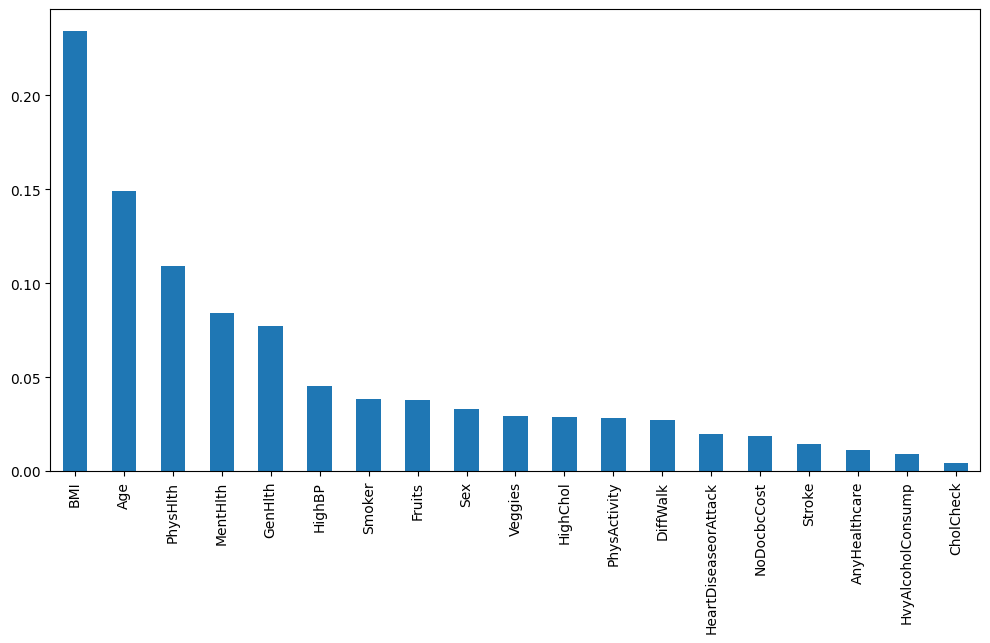

In [213]:
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=["Diabetes_012"]).columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.savefig("../visualisations/rf_feature_importances.png")
plt.show()

### Testing across features with correlation scores of >|0.1|

In [214]:
# Load Decision Tree model
if not 'rf_spec_model' in locals():
    rf_spec_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["rf_spec"] = metrics
print(results)

Training Time:  9.78675099999964
Average Prediction Time:  1.6590017607499164e-05
Accuracy:  0.8358956165247556
Precision:  (0.7940762012291269,)
Recall:  (0.8358956165247556,)
F1 Score:  0.8084035345420363
Confusion Matrix: 
 [[61211   106  2894]
 [ 1208     7   170]
 [ 8076    35  2397]]
Classification Report: 
 {'0.0': {'precision': 0.8683027165047167, 'recall': 0.9532790331874601, 'f1-score': 0.908808813267412, 'support': 64211.0}, '1.0': {'precision': 0.0472972972972973, 'recall': 0.005054151624548736, 'f1-score': 0.0091324200913242, 'support': 1385.0}, '2.0': {'precision': 0.43893059879143015, 'recall': 0.22811191473163303, 'f1-score': 0.3002066503851212, 'support': 10508.0}, 'accuracy': 0.8358956165247556, 'macro avg': {'precision': 0.4515102041978147, 'recall': 0.39548169984788056, 'f1-score': 0.40604929458128575, 'support': 76104.0}, 'weighted avg': {'precision': 0.7940762012291269, 'recall': 0.8358956165247556, 'f1-score': 0.8084035345420363, 'support': 76104.0}}



In [215]:
import csv
import os

def save_metrics(metrics, directory_name):
    # Create directory if it doesn't exist
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    
    # Save general metrics to CSV
    general_metrics_file = os.path.join(directory_name, 'general_metrics.csv')
    with open(general_metrics_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Metric", "Value"])
        for metric, value in metrics.items():
            if metric not in ["Confusion Matrix", "Classification Report"]:
                writer.writerow([metric, value])
    
    # Save confusion matrix to CSV
    confusion_matrix_file = os.path.join(directory_name, 'confusion_matrix.csv')
    with open(confusion_matrix_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([""] + ["Predicted 0", "Predicted 1", "Predicted 2"])
        for i, row in enumerate(metrics["Confusion Matrix"]):
            writer.writerow([f"Actual {i}"] + list(row))
    
    # Save classification report to CSV
    classification_report_file = os.path.join(directory_name, 'classification_report.csv')
    with open(classification_report_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Class", "Precision", "Recall", "F1-Score", "Support"])
        for label, c_metrics in metrics["Classification Report"].items():
            if isinstance(c_metrics, dict):
                writer.writerow([label, c_metrics["precision"], c_metrics["recall"], c_metrics["f1-score"], c_metrics["support"]])

In [216]:
from tqdm import tqdm

# Save all metrics to CSV files
for model, metrics in tqdm(model_metrics.items()):
    # General model metrics
    metrics["Precision"] = metrics["Precision"][0]
    metrics["Recall"] = metrics["Recall"][0]
    model_metrics[model] = metrics
    save_metrics(metrics, f'../results/{model}')

100%|██████████| 8/8 [00:00<00:00, 1179.50it/s]


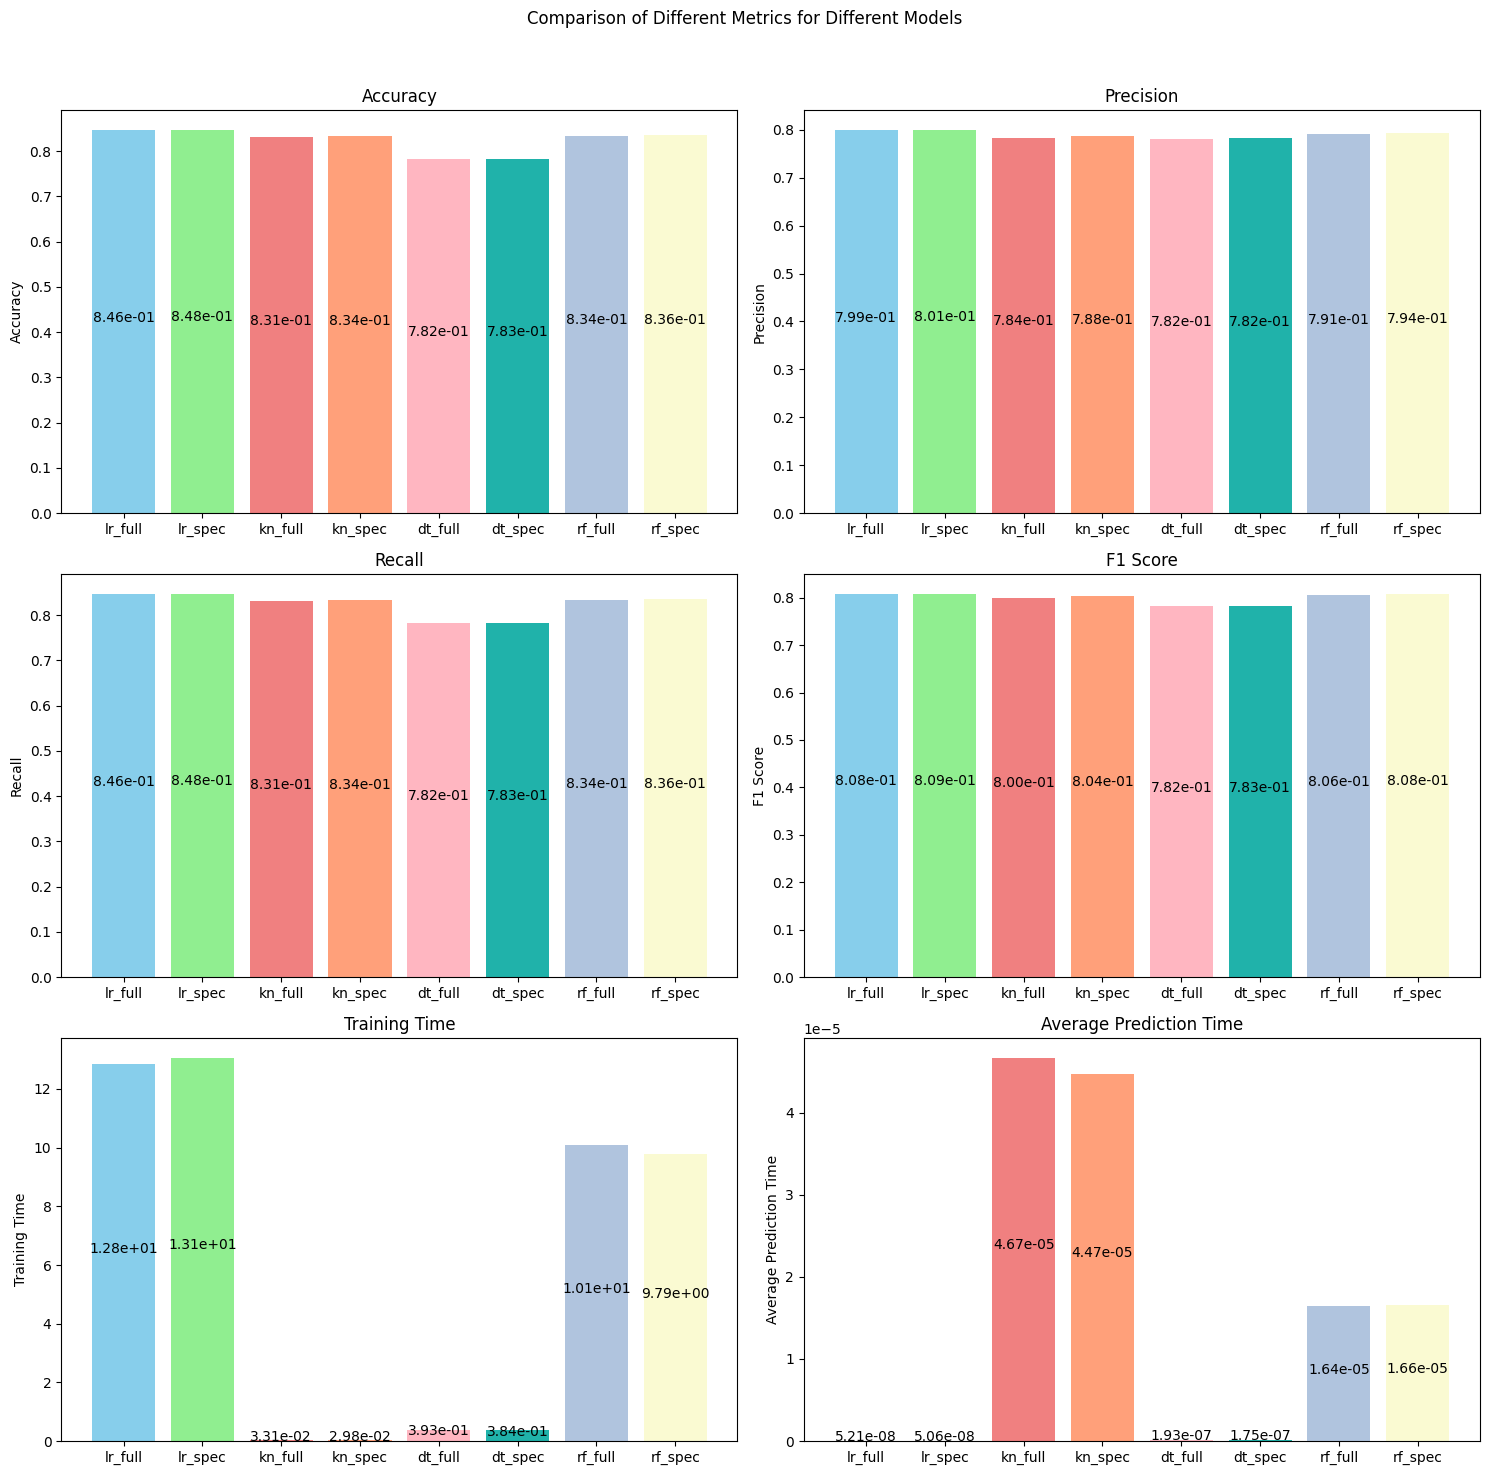

In [217]:
# Extract metrics from model_metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Average Prediction Time']

# Prepare data for plotting
metrics_data = {metric: {model: model_metrics[model][metric] for model in model_metrics} for metric in metrics_to_plot}

# Plot the metrics
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, metric in zip(axes.flatten(), metrics_to_plot):
    models = list(metrics_data[metric].keys())
    values = list(metrics_data[metric].values())
    
    # Plot the metric
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightseagreen', 'lightsteelblue', 'lightgoldenrodyellow']
    ax.bar(models, values, color=colors)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    for i, v in enumerate(values):
        ax.text(i, v * 0.5, f"{v:.2e}", ha='center')

plt.suptitle('Comparison of Different Metrics for Different Models')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('../visualisations/metrics_comparison.png')
plt.show()
